In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

import pickle

import os 
import sys


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

from sklearn.feature_selection import SelectPercentile, chi2

In [2]:
data = 'Data/final_modeling.csv'

In [3]:
df = pd.read_csv(data)
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,15000,2013.0,ford,others,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black
1,27990,2012.0,gmc,others,good,8 cylinders,gas,68696.0,clean,other,4wd,truck,black
2,34590,2016.0,chevrolet,others,good,6 cylinders,gas,29499.0,clean,other,4wd,truck,silver
3,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey
4,29990,2016.0,chevrolet,others,good,6 cylinders,gas,17302.0,clean,other,4wd,truck,red


In [4]:
def age(df):
    df['age'] = 2021 - df['year']
    df.drop('year', axis=1, inplace=True)
    return df

In [5]:
df = age(df)

In [6]:
df.head()

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age
0,15000,ford,others,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,8.0
1,27990,gmc,others,good,8 cylinders,gas,68696.0,clean,other,4wd,truck,black,9.0
2,34590,chevrolet,others,good,6 cylinders,gas,29499.0,clean,other,4wd,truck,silver,5.0
3,35000,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,2.0
4,29990,chevrolet,others,good,6 cylinders,gas,17302.0,clean,other,4wd,truck,red,5.0


In [7]:
df.shape

(106657, 13)

In [8]:
df = df.loc[:105657:,:]

In [9]:
numeric_features = ['odometer', 'age']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ['manufacturer', 'model', 'fuel',\
                        'title_status', 'transmission', 'drive', 'type', 'paint_color']
categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder()), 
    ('selector', SelectPercentile(chi2, percentile=50))])

ordinal_features = ['condition', 'cylinders']
ordinal_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder()),
    ('selector', SelectPercentile(chi2, percentile=50))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)])

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # X_train = preprocessor.fit_transform(X_train)
# # X_test = preprocessor.transform(X_test)
# y_train = np.log(y_train)
# y_test = np.log(y_test)

# model 

Regressor = RandomForestRegressor(max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', Regressor)])

# pipeline.fit(X_train, y_train)
from sklearn import set_config
set_config(display='diagram')
pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['odometer', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder()),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x1691ab5e0>))]),
                                                  ['manufacturer', 'model',
                                                   'fuel', 'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('ord',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder()),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x1691ab5e0>))]),
                                                  ['condition',
                                                   'cylinders'])])),
                ('model',
                 RandomForestRegressor(max_depth=50, max_features=3,
                                       min_samples_leaf=3, min_samples_split=8,
                                       n_estimators=1000))])

In [10]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('R2 score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2 score:  0.8403821352134755
MAE:  2839.35164375469


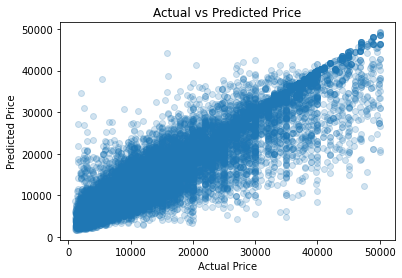

In [11]:
# scatter plot of actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

In [12]:
# save the model to disk
filename = 'cars_model_tiny.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

KeyboardInterrupt: 

In [ ]:
> X_tester = X_test.iloc[[112]]

In [ ]:
X_tester.head()

In [ ]:
{'manufacturer': 'ford',
 'model': 'f-150',
 'condition': 'good',
 'cylinders': '6 cylinders',
 'fuel': 'gas',
 'odometer': 100000,
 'title_status': 'clean',
 'transmission': 'automatic',
 'drive': '4wd',
 'type': 'truck',
 'paint_color': 'white',
 'age': 10}

In [ ]:
y_pred = pipeline.predict(X_tester)
print(y_pred)

In [ ]:
y_test.iloc[[112]]

In [ ]:
testmodel = pickle.load(open('cars_model.pkl', 'rb'))

In [ ]:
y_pred = testmodel.predict(X_tester)
print(y_pred)

In [ ]:
import requests
import json

In [ ]:
# testing 
url = 'http://127.0.0.1:5000/predictcar'

data = {"manufacturer": "ford",
 "model": "f-150",
 "condition": "good",
 "cylinders": "6 cylinders",
 "fuel": "gas",
 "odometer": 100000,
 "title_status": "clean",
 "transmission": "automatic",
 "drive": "4wd",
 "type": "truck",
 "paint_color": "white",
 "year": 2010}

import requests
res = requests.post(url, json= data)
if res.ok:
    print(res)
    print(res.json())
else:
    print(res)

In [ ]:
string = "5000"

In [ ]:
int(string)